In [22]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [57]:
PROB_HEAD = 0.55
DISCOUNT_RATE = 1.0
REWARD = 1.0
MAX_CAPITAL = 100
MIN_CAPITAL = 0

In [58]:
states = np.arange(MIN_CAPITAL, MAX_CAPITAL+1)
print(states)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [59]:
actions = np.arange(51)
print(actions)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [60]:
policy = np.zeros(len(states))
stateVal = np.zeros(len(states))
stateVal[MAX_CAPITAL] = 1.0
newStateVal = np.zeros(len(states))

In [61]:
def expectedReturn(state, action, stateVal):
    if state == MAX_CAPITAL:
        returns = 1
    elif state == MIN_CAPITAL:
        returns = 0
    else:
        reward = 0.0
        returns = 0.0
        for prob, next_state in zip([PROB_HEAD, 1-PROB_HEAD], [int(min(state+action, MAX_CAPITAL)), int(max(MIN_CAPITAL, state-action))]):
            returns += prob * (reward + DISCOUNT_RATE*stateVal[next_state])

    return returns

In [62]:
improvePolicy = False
policyStable = False

k = 0
policy_list = [policy]

while policyStable == False:
    ## Policy Evaluation
    print("Policy Eval")
    delta = 0.0
    for state in states:
        stateVal_list = []
        v = stateVal[state].copy()
        for action in actions:
            stateVal_list.append(expectedReturn(state, action, stateVal))
        stateVal[state] = max(stateVal_list)
        delta = np.maximum(delta, np.absolute(v-stateVal[state]))   
    print(delta)
    if delta < 1e-7:
        print("Almost converged")
        improvePolicy = True

    #stateVal = newStateVal.copy()

    ## Policy Improvement
    if improvePolicy == True:
        print("Improve Policy: ", k)
        new_policy = np.zeros_like(policy)
        for state in states:
            actionReturns = []
            for action in actions:
                if action <= min(state, MAX_CAPITAL-state):
                    actionReturns.append(expectedReturn(state, action, stateVal))
                else:
                    actionReturns.append(-float('inf'))
            bestAction = actions[np.argmax(actionReturns)]
            new_policy[state] = bestAction
        policyStable = True
        policyChanges = sum(new_policy != policy)
        if policyChanges == 0:
            policyStable = True
        else:
            improvePolicy = False
            
        policy = new_policy.copy()
        policy_list.append(policy)

    k += 1

Policy Eval
0.991696234375
Policy Eval
0.675975953125
Policy Eval
0.21711937500000006
Policy Eval
0.08212472509570318
Policy Eval
0.04389589510597269
Policy Eval
0.022690462866587324
Policy Eval
0.012805911497856592
Policy Eval
0.00921043537758709
Policy Eval
0.007909162806971182
Policy Eval
0.007226568996521632
Policy Eval
0.0066637909639866155
Policy Eval
0.006237878034531574
Policy Eval
0.005881220514526109
Policy Eval
0.005568854103225829
Policy Eval
0.005320795206905982
Policy Eval
0.005080213488145802
Policy Eval
0.004857575038964779
Policy Eval
0.004671055962858217
Policy Eval
0.004503100075555211
Policy Eval
0.004344874000279608
Policy Eval
0.0042047082980819495
Policy Eval
0.0040767077076331315
Policy Eval
0.003956483030896352
Policy Eval
0.003854336889623
Policy Eval
0.003748359332391926
Policy Eval
0.0036580580239922167
Policy Eval
0.003567566986308446
Policy Eval
0.003478231378935215
Policy Eval
0.003406370596980457
Policy Eval
0.0033336493718454374
Policy Eval
0.0032596697

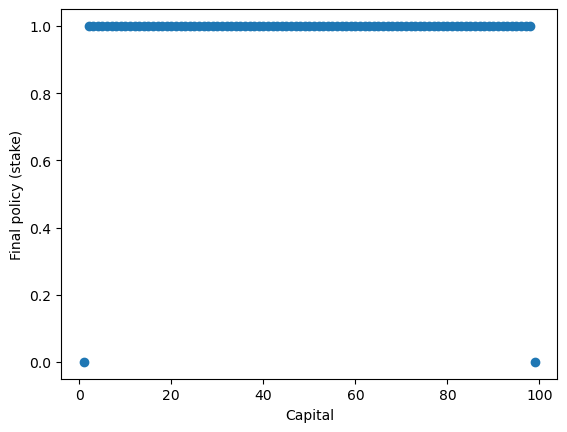

In [63]:
plt.scatter(states[1:100], policy[states[1:100]])
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.show()

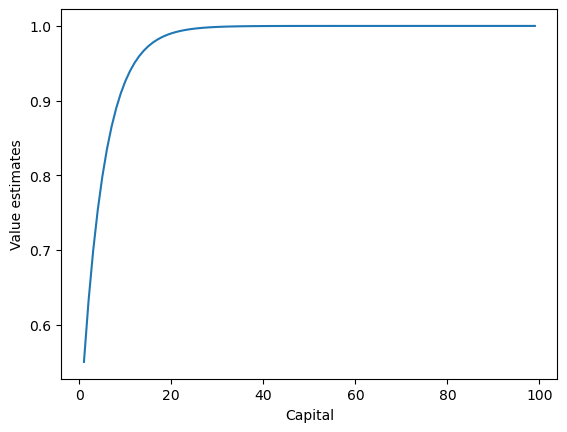

In [64]:
plt.plot(states[1:100], stateVal[states[1:100]])
plt.xlabel("Capital")
plt.ylabel("Value estimates")
plt.show()